In [31]:
import simpledorff
import pandas as pd
from scipy.stats import pearsonr

In [32]:
group_data = pd.read_csv("group_7_update.csv")
group_data.head()

,Premise_ID,Argument_ID,annotator,persuasiveness,changeability,premise_agreement
0,o6bf41,h2rd2l7,yangiwen,1,3,2
1,d7umx2,f14uijw,yangiwen,3,2,2
2,o12h3k,h1yg21a,yangiwen,4,1,1
3,smwz6w,hvzm5jk,yangiwen,3,1,1
4,e31b8l,f91bbu4,yangiwen,2,4,3


compute r

In [33]:
result = group_data.pivot_table(index=['Premise_ID', 'Argument_ID'], columns='annotator', values='persuasiveness').corr()

In [34]:
result

annotator,kuminia,yangiwen,yuazheng
annotator,,,
kuminia,1.00000,0.48331,0.48832
yangiwen,0.48331,1.00000,0.71069
yuazheng,0.48832,0.71069,1.00000


compute α

In [35]:
simpledorff.calculate_krippendorffs_alpha_for_df(
    group_data,
    experiment_col=['Premise_ID','Argument_ID'],
    annotator_col='annotator',
    class_col='persuasiveness'
)

0.22394745686275064

In [36]:
simpledorff.calculate_krippendorffs_alpha_for_df(group_data,experiment_col=['Premise_ID','Argument_ID'],
                                                 annotator_col='annotator',
                                                 class_col='persuasiveness')

0.22394745686275064

In [39]:
def interval_metric(x,y):
    return (x-y)**2

simpledorff.calculate_krippendorffs_alpha_for_df(group_data,experiment_col=['Premise_ID','Argument_ID'],
                                                 annotator_col='annotator',
                                                 class_col='persuasiveness',
                                                 metric_fn = interval_metric)

0.54558144167421

For the class

In [40]:
class_data = pd.read_csv("si630w23-hw3-train.individual-annotations.csv")
class_data.head()

,Premise_ID,Argument_ID,annotator,persuasiveness,changeability,premise_agreement,Group_ID
0,bwp793,epz6cy3,group-17_person-0,2,5,6,17
1,bwp793,epz6cy3,group-17_person-1,5,5,5,17
2,bxv6l3,eqal0ne,group-17_person-0,2,4,3,17
3,bxv6l3,eqal0ne,group-17_person-1,2,4,3,17
4,bzyex3,eqyhthf,group-17_person-0,2,1,1,17


In [41]:
problem_7 = pd.merge(class_data, group_data, on=["Premise_ID","Argument_ID"], how='inner')

In [42]:
problem_7 = problem_7[problem_7["Group_ID"] != 7]

In [43]:
problem_7 = problem_7[["Premise_ID","Argument_ID","annotator_x","persuasiveness_x","changeability_x","premise_agreement_x"]]

In [44]:
problem_7 = problem_7.drop_duplicates()

In [45]:
result = problem_7.pivot_table(index=['Premise_ID', 'Argument_ID'], columns='annotator_x', values='persuasiveness_x').corr()


Here is the r

In [46]:
result

annotator_x,group-02_person-0,group-02_person-1,group-02_person-2,group-03_person-0,group-03_person-1,group-08_person-0,group-08_person-1,group-08_person-2,group-09_person-0,group-09_person-1,group-09_person-2,group-17_person-0,group-17_person-1,group-18_person-0,group-18_person-1,group-19_person-0,group-21_person-0,group-21_person-1,group-22_person-0,group-22_person-1
annotator_x,,,,,,,,,,,,,,,,,,,,
group-02_person-0,1.000000,0.614138,0.797407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-02_person-1,0.614138,1.000000,0.628971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-02_person-2,0.797407,0.628971,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-03_person-0,NaN,NaN,NaN,1.000000,0.878775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-03_person-1,NaN,NaN,NaN,0.878775,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-08_person-0,NaN,NaN,NaN,NaN,NaN,1.000000,0.493671,0.629804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-08_person-1,NaN,NaN,NaN,NaN,NaN,0.493671,1.000000,0.723596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-08_person-2,NaN,NaN,NaN,NaN,NaN,0.629804,0.723596,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group-09_person-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.467707,0.580288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here is the α

In [47]:
simpledorff.calculate_krippendorffs_alpha_for_df(
    problem_7,
    experiment_col=['Premise_ID','Argument_ID'],
    annotator_col='annotator_x',
    class_col='persuasiveness_x'
)

0.3177428982759226

In [48]:
simpledorff.calculate_krippendorffs_alpha_for_df(
    problem_7,
    experiment_col=['Premise_ID','Argument_ID'],
    annotator_col='annotator_x',
    class_col='persuasiveness_x',
    metric_fn = interval_metric
)

0.5807992465016146

## Examining Disagreements

In [21]:
group_data['persuasiveness'] = group_data['persuasiveness'].astype("int")

In [22]:
problem_7['persuasiveness_x'] = problem_7['persuasiveness_x'].astype("int")

In [23]:
group_data.head()

,Premise_ID,Argument_ID,annotator,persuasiveness,changeability,premise_agreement
0,o6bf41,h2rd2l7,yangiwen,1,3,2
1,d7umx2,f14uijw,yangiwen,3,2,2
2,o12h3k,h1yg21a,yangiwen,4,1,1
3,smwz6w,hvzm5jk,yangiwen,3,1,1
4,e31b8l,f91bbu4,yangiwen,2,4,3


In [24]:
group_data_ex = group_data.groupby(["Premise_ID","Argument_ID"]).mean().reset_index()

/var/folders/pc/2bcs5scj259ct_h4r90409jc0000gn/T/ipykernel_34476/1222199414.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data_ex = group_data.groupby(["Premise_ID","Argument_ID"]).mean().reset_index()


In [25]:
problem_7_ex = problem_7.groupby(["Premise_ID","Argument_ID"]).mean().reset_index()

/var/folders/pc/2bcs5scj259ct_h4r90409jc0000gn/T/ipykernel_34476/989899011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  problem_7_ex = problem_7.groupby(["Premise_ID","Argument_ID"]).mean().reset_index()


In [26]:
examining_df = pd.merge(group_data_ex, problem_7_ex, on=["Premise_ID","Argument_ID"], how='inner')

In [27]:
examining_df["diff"] = abs(examining_df["persuasiveness"] - examining_df["persuasiveness_x"])

In [28]:
examining_df.sort_values(by="diff",ascending=False).head(10)

,Premise_ID,Argument_ID,persuasiveness,changeability,premise_agreement,persuasiveness_x,changeability_x,premise_agreement_x,diff
96,m6j48e,gr8b7e6,4.000000,3.666667,3.333333,1.0,5.0,5.0,3.000000
37,e62jxn,f9on1t1,3.666667,2.666667,5.000000,1.0,2.5,2.0,2.666667
92,lgeqip,gmqz16l,2.333333,3.666667,4.000000,5.0,3.0,3.0,2.666667
70,heirw1,fvrh8zt,2.666667,2.333333,2.666667,5.0,1.0,2.0,2.333333
13,cmrrgp,ew4hclg,1.333333,4.000000,3.000000,3.5,3.0,3.5,2.166667
115,o9pyz7,h3d4kwe,1.333333,1.000000,4.333333,3.5,2.5,3.5,2.166667
67,h8mamc,furo6om,3.666667,3.333333,1.666667,1.5,2.0,1.0,2.166667
85,jyvfqs,gd8o2kz,2.000000,2.333333,4.333333,4.0,1.5,4.5,2.000000
62,gihcx1,fqem647,1.000000,2.333333,3.000000,3.0,2.5,3.0,2.000000
61,gez1fy,fpque4g,2.000000,3.333333,3.333333,4.0,2.5,4.0,2.000000


# Part2

In [3]:
from transformers import Trainer, TrainingArguments, RobertaTokenizer, RobertaForSequenceClassification, AutoTokenizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import pandas as pd
import torch
import numpy as np

In [4]:
train_dataset = pd.read_csv("si630w23-hw3-train.csv")
eval_dataset = pd.read_csv("si630w23-hw3-dev.csv")

train_dataset = train_dataset[["Argument","persuasiveness"]]
eval_dataset = eval_dataset[["Argument","persuasiveness"]]

train_dataset = train_dataset.rename(columns={'Argument': 'text', 'persuasiveness': 'score'})
eval_dataset = eval_dataset.rename(columns={'Argument': 'text', 'persuasiveness': 'score'})

In [6]:
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_dataset)
eval_dataset = Dataset.from_pandas(eval_dataset)

In [7]:
testDataset = pd.read_csv("si630w23-hw3-test.public.csv")
# testDataset = testDataset[["Argument"]]
testDataset = testDataset.rename(columns={"Argument": "text"})
testDataset = Dataset.from_pandas(testDataset)

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding
from torch.utils.data import DataLoader

BASE_MODEL = "microsoft/MiniLM-L12-H384-uncased"
LEARNING_RATE = 1e-2
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 20

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=1, ignore_mismatched_sizes=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/MiniLM-L12-H384-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
ds = {"train": train_dataset, "test": eval_dataset}

def preprocess_function(examples):
    label = examples["score"] 
    examples = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=256)
    
    # Change this to real number
    examples["label"] = float(label)
    return examples

for split in ds:
    ds[split] = ds[split].map(preprocess_function, remove_columns=["text", "score"])

Map:   0%|          | 0/2415 [00:00<?, ? examples/s]

Map:   0%|          | 0/517 [00:00<?, ? examples/s]

In [10]:
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def compute_metrics_for_regression(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)
    
    mse = mean_squared_error(labels, logits)
    rmse = mean_squared_error(labels, logits, squared=False)
    mae = mean_absolute_error(labels, logits)
    logits_list = list(map(int, list(np.rint(logits))))
    labels_list = list(map(int, list(np.rint(labels))))
    errors = ((np.array(logits_list) - np.array(labels_list)).flatten()**2).tolist()
    
    # Compute accuracy 
    # Based on the fact that the rounded score = true score only if |single_squared_errors| < 0.5
    accuracy = sum([1 for e in errors if e == 0]) / len(errors)
    
    return {"mse": mse, "rmse": rmse, "mae": mae, "accuracy": accuracy}

In [12]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="SI630",  # output directory
    learning_rate=1e-5,
    num_train_epochs=10,  # total number of training epochs
    per_device_train_batch_size=BATCH_SIZE,  # batch size per device during training
    per_device_eval_batch_size=8,  # batch size for evaluation
    weight_decay=0.01,  # strength of weight decay
    do_eval=True,
    report_to="none",
    evaluation_strategy="steps",
    eval_steps=100,
)

In [13]:
import torch

class RegressionTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0][:, 0]
        loss = torch.nn.functional.mse_loss(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [14]:
trainer = RegressionTrainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["test"],
    compute_metrics=compute_metrics_for_regression,
)

trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Mse,Rmse,Mae,Accuracy
100,No log,2.574574,2.574574,1.604548,1.373500,0.317215
200,No log,0.917579,0.917579,0.957903,0.768244,0.452611
300,No log,0.591500,0.591500,0.769090,0.601562,0.475822
400,No log,0.473215,0.473215,0.687906,0.523620,0.541586
500,1.712800,0.530342,0.530342,0.728246,0.555293,0.539652
600,1.712800,0.465432,0.465432,0.682226,0.523129,0.558994
700,1.712800,0.454745,0.454745,0.674348,0.520894,0.541586
800,1.712800,0.471316,0.471316,0.686525,0.531385,0.539652
900,1.712800,0.489198,0.489198,0.699427,0.533843,0.557060
1000,0.416900,0.527170,0.527170,0.726065,0.556198,0.541586


TrainOutput(global_step=1510, training_loss=0.8260342842695729, metrics={'train_runtime': 167.5484, 'train_samples_per_second': 144.137, 'train_steps_per_second': 9.012, 'total_flos': 795398934758400.0, 'train_loss': 0.8260342842695729, 'epoch': 10.0})

In [ ]:
model = model.to("cuda")

In [ ]:
import math
import pandas as pd

nb_batches = math.ceil(len(eval_dataset)/BATCH_SIZE)
y_preds = []

for i in range(nb_batches):
    input_texts = eval_dataset[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["text"]
    input_labels = eval_dataset[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["score"]
    encoded = tokenizer(input_texts, truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    encoded = encoded.to("cuda")
    y_preds += model(**encoded).logits.reshape(-1).tolist()

pd.set_option('display.max_rows', 500)
df = pd.DataFrame([eval_dataset["text"], eval_dataset["score"], y_preds], ["Text", "Score", "Prediction"]).T
df["Rounded Prediction"] = df["Prediction"].apply(round)
df["Rounded Score"] = df["Score"].apply(round)
df["acc"] = df["Rounded Score"] - df["Rounded Prediction"]
df_eval = df

In [ ]:
df_eval["acc"].value_counts()[0]/len(df)

0.4661508704061896

In [ ]:
column1 = df_eval['Score']
column2 = df_eval['Prediction']

mse = mean_squared_error(column1, column2)
mse

0.5907926823375413

In [16]:
import math
import pandas as pd

nb_batches = math.ceil(len(train_dataset)/BATCH_SIZE)
y_preds = []

for i in range(nb_batches):
    input_texts = train_dataset[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["text"]
    input_labels = train_dataset[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["score"]
    encoded = tokenizer(input_texts, truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    encoded = encoded.to("cuda")
    y_preds += model(**encoded).logits.reshape(-1).tolist()

pd.set_option('display.max_rows', 500)
df = pd.DataFrame([train_dataset["text"], train_dataset["score"], y_preds], ["Text", "Score", "Prediction"]).T
df["Rounded Prediction"] = df["Prediction"].apply(round)
df["Rounded Score"] = df["Score"].apply(round)
df["acc"] = df["Rounded Score"] - df["Rounded Prediction"]
df_train = df

In [17]:
df_train["acc"].value_counts()[0]/len(df)

0.5747412008281574

In [18]:
column1 = df_train['Score']
column2 = df_train['Prediction']

mse = mean_squared_error(column1, column2)
mse

0.3396339368448748

In [19]:
nb_batches = math.ceil(len(testDataset)/BATCH_SIZE)
y_preds = []

for i in range(nb_batches):
    input_texts = testDataset[i * BATCH_SIZE: (i+1) * BATCH_SIZE]["text"]
    encoded = tokenizer(input_texts, truncation=True, padding="max_length", max_length=256, return_tensors="pt")
    encoded = encoded.to("cuda")
    y_preds += model(**encoded).logits.reshape(-1).tolist()

pd.set_option('display.max_rows', 500)
df = pd.DataFrame([testDataset["text"], testDataset["Argument_ID"], y_preds], ["Text", "Id", "Prediction"]).T
df["Rounded Prediction"] = df["Prediction"].apply(round)
df_test = df

In [20]:
df_test

,Text,Id,Prediction,Rounded Prediction
0,"In Britain, a ton is colloquially used to refe...",i3xz4vd,2.050052,2
1,"It's very limiting to exclude morals, because ...",h34r5lw,3.957856,4
2,"""If a college is choosing to not use merit for...",gygklw9,3.332541,3
3,The Cambridge victims didn’t consent to their ...,etvbrbo,1.824615,2
4,Why are the two mutually exclusive? You can ha...,etcjf4q,2.558424,3
...,...,...,...,...
513,"They're intelligent, but they don't have the e...",ezr9s9d,2.463666,2
514,I would argue that there is nothing you can do...,gwqf4ys,2.36496,2
515,It’s all about the story telling. The plot is...,i4nz2lt,3.096567,3
516,&gt;Do people really identify themselves based...,gclzuoe,3.082442,3


In [21]:
resultDf = df_test[["Id", "Prediction"]]
resultDf = resultDf.rename(columns={"Id": "Argument_ID", "Prediction": "persuasiveness"})

In [22]:
resultDf.to_csv("result.csv", index=False)

# Part3

In [ ]:
part3 = pd.read_csv("si630w23-hw3-dev.individual-annotations.csv")
eval_dataset = pd.read_csv("si630w23-hw3-dev.csv")

In [ ]:
extracted_col = df_eval["Prediction"]

In [ ]:
eval_dataset = eval_dataset.join(extracted_col)

In [ ]:
merged_df = pd.merge(part3, eval_dataset, on=['Premise_ID', 'Argument_ID'], how='inner')

In [ ]:
merged_df = merged_df[["Premise_ID","Argument_ID", "annotator", "Prediction", "persuasiveness_x", "changeability", "premise_agreement", "Group_ID"]]



In [ ]:
merged_df = merged_df.rename(columns={'persuasiveness_x': 'persuasiveness'})

In [ ]:
merged_df['Prediction'] = merged_df['Prediction'].astype("float")

In [ ]:
result_list = []

for exclude_group in merged_df['Group_ID'].unique():
    # exclude the current group and calculate the mean value for each group
    df_exclude = merged_df[merged_df['Group_ID'] != exclude_group]
    mean_values = df_exclude[["Prediction","persuasiveness","changeability","premise_agreement"]].mean()
    
    result_list.append(mean_values.to_frame(name=exclude_group))
    
    
result_df = pd.concat(result_list, axis=1)

result_df = result_df.transpose().reset_index()

result_df = result_df.rename(columns={'index': 'Group_ID'})

result_df

,Group_ID,Prediction,persuasiveness,changeability,premise_agreement
0,1,2.844874,2.959172,3.178263,3.290972
1,15,2.844914,2.985102,3.170701,3.314711
2,7,2.849727,2.935862,3.153374,3.292248
3,16,2.855756,2.890751,3.165115,3.279330
4,11,2.846048,2.933333,3.170190,3.313821
5,12,2.855383,2.889069,3.172078,3.281385
6,5,2.854452,2.876623,3.206710,3.292208
7,4,2.861840,2.908500,3.136437,3.263129
8,6,2.849508,2.916531,3.169106,3.244986
9,2,2.851607,2.923925,3.163175,3.262955


In [ ]:
each_group = merged_df.groupby("Group_ID").mean().reset_index()

In [ ]:
each_group

,Group_ID,Prediction,persuasiveness,changeability,premise_agreement
0,1,2.904513,2.595238,3.071429,3.214286
1,2,2.847175,2.866667,3.214815,3.548148
2,4,2.660443,3.127451,3.715686,3.637255
3,5,2.793618,3.712871,2.435644,3.108911
4,6,2.883087,2.980769,3.125000,3.951923
5,7,2.869373,2.737179,3.320513,3.173077
6,10,2.873948,3.097087,2.786408,3.291262
7,11,2.944460,2.682692,3.105769,2.730769
8,12,2.776588,3.485149,3.069307,3.306931
9,13,2.853642,2.941176,3.620915,3.366013


In [ ]:
ground_truth_score = pd.merge(each_group, result_df, on=['Group_ID'], how='inner')

In [ ]:
ground_truth_score

,Group_ID,Prediction_x,persuasiveness_x,changeability_x,premise_agreement_x,Prediction_y,persuasiveness_y,changeability_y,premise_agreement_y
0,1,2.904513,2.595238,3.071429,3.214286,2.844874,2.959172,3.178263,3.290972
1,2,2.847175,2.866667,3.214815,3.548148,2.851607,2.923925,3.163175,3.262955
2,4,2.660443,3.127451,3.715686,3.637255,2.861840,2.908500,3.136437,3.263129
3,5,2.793618,3.712871,2.435644,3.108911,2.854452,2.876623,3.206710,3.292208
4,6,2.883087,2.980769,3.125000,3.951923,2.849508,2.916531,3.169106,3.244986
5,7,2.869373,2.737179,3.320513,3.173077,2.849727,2.935862,3.153374,3.292248
6,10,2.873948,3.097087,2.786408,3.291262,2.850036,2.910076,3.187974,3.282232
7,11,2.944460,2.682692,3.105769,2.730769,2.846048,2.933333,3.170190,3.313821
8,12,2.776588,3.485149,3.069307,3.306931,2.855383,2.889069,3.172078,3.281385
9,13,2.853642,2.941176,3.620915,3.366013,2.851100,2.918151,3.128062,3.275612


In [ ]:
ground_truth_score.rename(columns={
    'Prediction_x': 'Prediction_group',
    'persuasiveness_x': 'persuasiveness_group',
    'changeability_x': 'changeability_group',
    'premise_agreement_x': 'premise_agreement_group',
    'Prediction_y': 'Prediction_left',
    'persuasiveness_y': 'persuasiveness_left',
    'changeability_y': 'changeability_left',
    'premise_agreement_y': 'premise_agreement_left',
})

,Group_ID,Prediction_group,persuasiveness_group,changeability_group,premise_agreement_group,Prediction_left,persuasiveness_left,changeability_left,premise_agreement_left
0,1,2.904513,2.595238,3.071429,3.214286,2.844874,2.959172,3.178263,3.290972
1,2,2.847175,2.866667,3.214815,3.548148,2.851607,2.923925,3.163175,3.262955
2,4,2.660443,3.127451,3.715686,3.637255,2.861840,2.908500,3.136437,3.263129
3,5,2.793618,3.712871,2.435644,3.108911,2.854452,2.876623,3.206710,3.292208
4,6,2.883087,2.980769,3.125000,3.951923,2.849508,2.916531,3.169106,3.244986
5,7,2.869373,2.737179,3.320513,3.173077,2.849727,2.935862,3.153374,3.292248
6,10,2.873948,3.097087,2.786408,3.291262,2.850036,2.910076,3.187974,3.282232
7,11,2.944460,2.682692,3.105769,2.730769,2.846048,2.933333,3.170190,3.313821
8,12,2.776588,3.485149,3.069307,3.306931,2.855383,2.889069,3.172078,3.281385
9,13,2.853642,2.941176,3.620915,3.366013,2.851100,2.918151,3.128062,3.275612


In [ ]:
merged_df

,Premise_ID,Argument_ID,annotator,Prediction,persuasiveness,changeability,premise_agreement,Group_ID
0,c0871y,er4ecb5,group-01_person-0,2.765856,2,4,1,1
1,c0871y,er4ecb5,group-01_person-1,2.765856,2,4,3,1
2,c0871y,er4ecb5,group-01_person-2,2.765856,2,4,2,1
3,c0871y,er4ecb5,group-15_person-0,2.765856,3,4,3,15
4,c0871y,er4ecb5,group-15_person-1,2.765856,3,2,5,15
...,...,...,...,...,...,...,...,...
1944,hleg9m,fwz0qr0,group-05_person-1,1.601945,4,2,3,5
1945,vidpem,idcdjce,group-05_person-0,1.066202,2,3,4,5
1946,vidpem,idcdjce,group-05_person-1,1.066202,3,1,6,5
1947,c7ij48,esfduea,group-05_person-0,3.653816,3,3,3,5


In [ ]:
import matplotlib.pyplot as plt

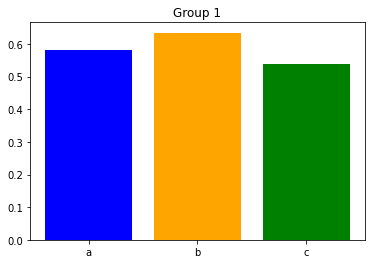

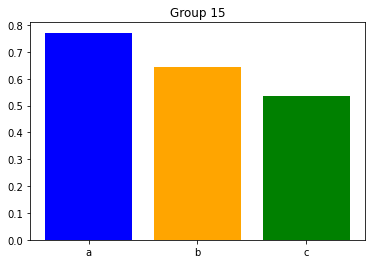

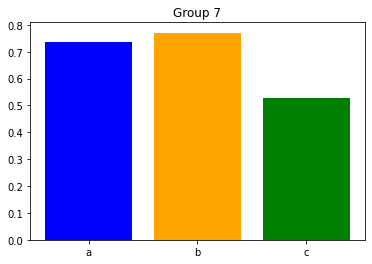

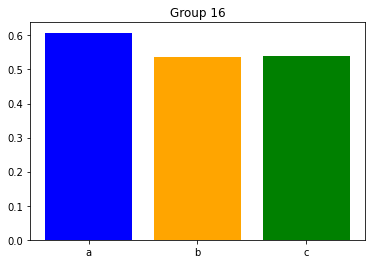

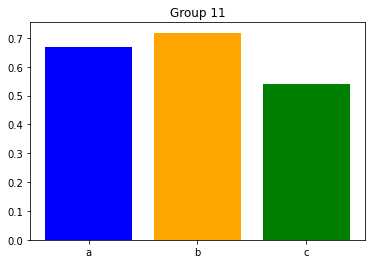

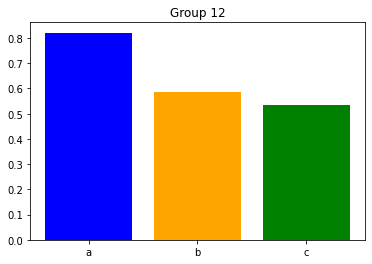

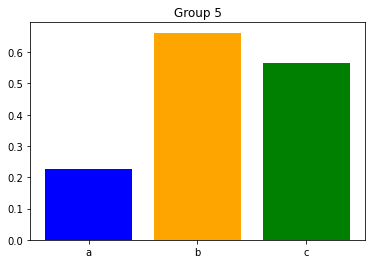

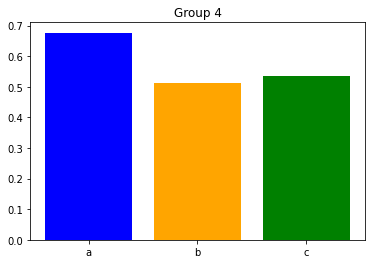

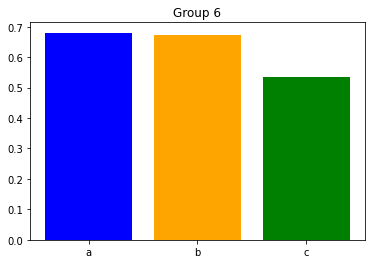

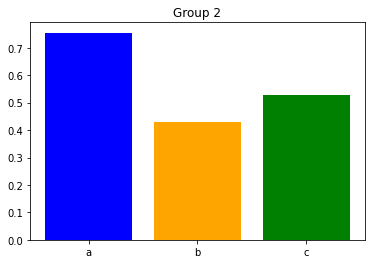

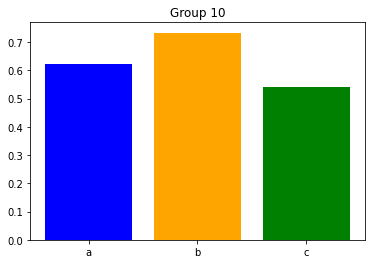

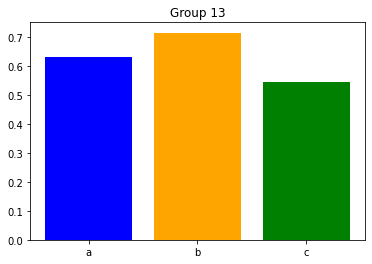

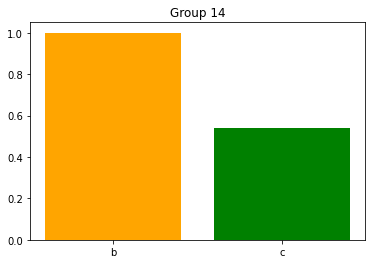

In [ ]:
for groupId in merged_df["Group_ID"].unique():
  r = []
  groupAvg = merged_df[merged_df["Group_ID"] == groupId]
  groupAvg = groupAvg.groupby("Argument_ID").mean().reset_index()
  groupAvg = groupAvg[["Argument_ID", "Prediction", "persuasiveness"]]
  r.append(groupAvg["Prediction"].corr(groupAvg["persuasiveness"], method="pearson"))
  otherGroupAvg = merged_df.merge(groupAvg[["Argument_ID"]], on="Argument_ID")
  otherGroupAvg = otherGroupAvg[otherGroupAvg["Group_ID"] != groupId]
  otherGroupAvg = otherGroupAvg[["Argument_ID", "Prediction", "persuasiveness"]]
  otherGroupAvg = otherGroupAvg.groupby("Argument_ID").mean().reset_index()
  r.append(otherGroupAvg["Prediction"].corr(otherGroupAvg["persuasiveness"], method="pearson"))
  allOtherGroup = merged_df[merged_df["Group_ID"] != groupId]
  r.append(allOtherGroup["Prediction"].corr(allOtherGroup["persuasiveness"], method="pearson"))
  fig, ax = plt.subplots()
  ax.bar(x=["a", "b", "c"], height=r, align='center', color=["blue", "orange", "green"])
  ax.set_title("Group %d" % (groupId))
  plt.show()

In [ ]:
def get_seperate_group(exclude_group):
    
    group_df = merged_df[merged_df['Group_ID'] == exclude_group]
    
    left_df = merged_df[merged_df['Group_ID'] != exclude_group]
        
    return group_df, left_df

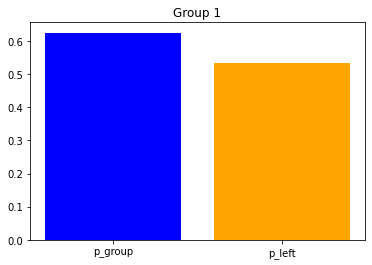

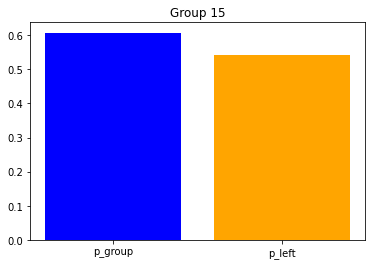

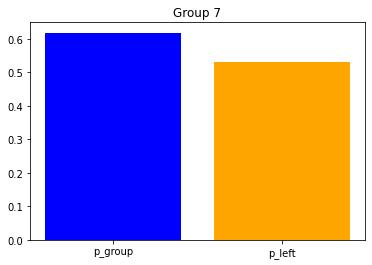

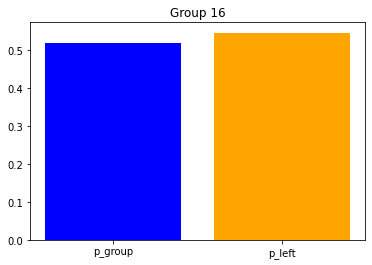

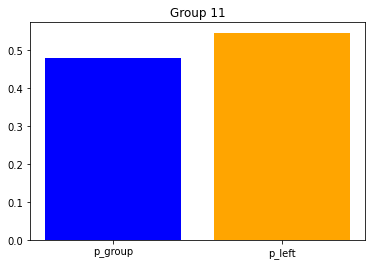

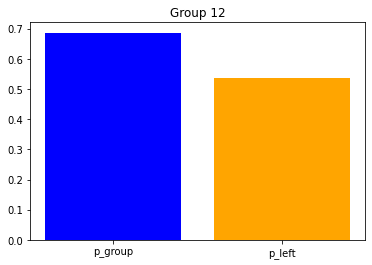

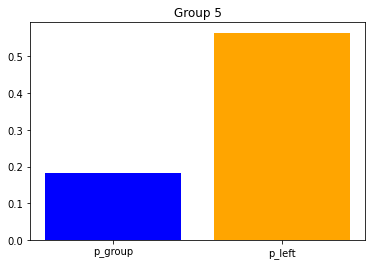

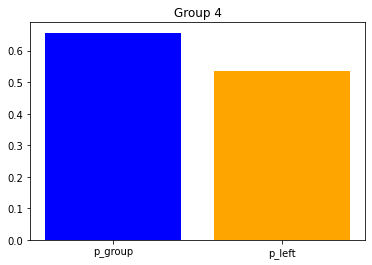

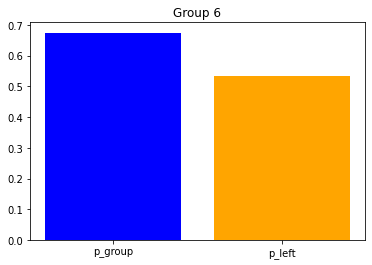

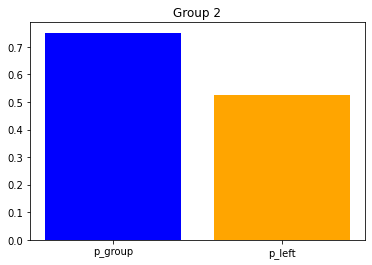

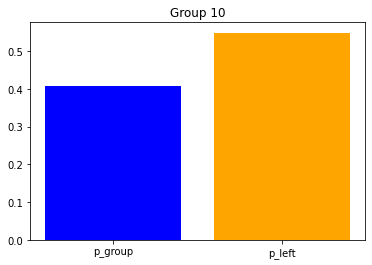

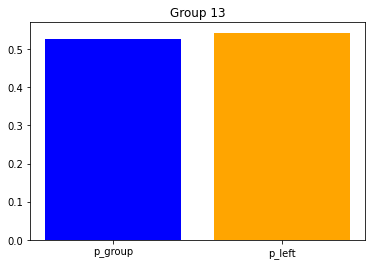

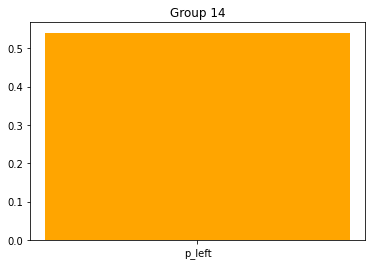

In [ ]:
for exclude_group in merged_df['Group_ID'].unique():
    a,b = get_seperate_group(exclude_group)
    p_group = a['Prediction'].corr(a['persuasiveness'], method='pearson')
    p_left = b['Prediction'].corr(b['persuasiveness'], method='pearson')
    
    fig, ax = plt.subplots()
    
    ax.bar(x=["p_group","p_left"], height=[p_group,p_left], align='center', color=["blue","orange"])

    ax.set_title('Group {}'.format(exclude_group))
    
    plt.show()
    

In [ ]:
# Note group 14 only have p_left, because it has constant persuasiveness 3:
merged_df[merged_df["Group_ID"]==14]

,Premise_ID,Argument_ID,annotator,Prediction,persuasiveness,changeability,premise_agreement,Group_ID,difference
328,n3178a,gwmxasd,group-14_person-0,2.870203,3,5,2,14,0.129797
329,n3178a,gwmxasd,group-14_person-1,2.870203,3,3,3,14,0.129797
334,jhtdzf,ga293hg,group-14_person-0,3.947413,3,3,2,14,0.947413
335,jhtdzf,ga293hg,group-14_person-1,3.947413,3,3,1,14,0.947413


Problem 14

In [ ]:
merged_df["difference"] = abs(merged_df["persuasiveness"] - merged_df["Prediction"])

In [ ]:
merged_df

,Premise_ID,Argument_ID,annotator,Prediction,persuasiveness,changeability,premise_agreement,Group_ID,difference
0,c0871y,er4ecb5,group-01_person-0,2.612713,2,4,1,1,0.612713
1,c0871y,er4ecb5,group-01_person-1,2.612713,2,4,3,1,0.612713
2,c0871y,er4ecb5,group-01_person-2,2.612713,2,4,2,1,0.612713
3,c0871y,er4ecb5,group-15_person-0,2.612713,3,4,3,15,0.387287
4,c0871y,er4ecb5,group-15_person-1,2.612713,3,2,5,15,0.387287
...,...,...,...,...,...,...,...,...,...
1944,hleg9m,fwz0qr0,group-05_person-1,1.706017,4,2,3,5,2.293983
1945,vidpem,idcdjce,group-05_person-0,1.574345,2,3,4,5,0.425655
1946,vidpem,idcdjce,group-05_person-1,1.574345,3,1,6,5,1.425655
1947,c7ij48,esfduea,group-05_person-0,3.880036,3,3,3,5,0.880036


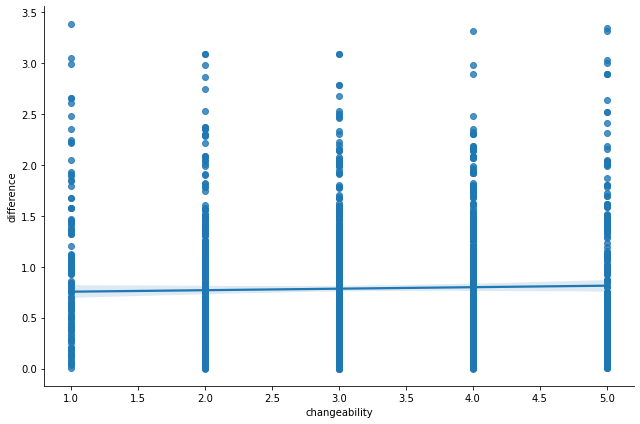

In [ ]:
import seaborn as sns

sns.lmplot(x='changeability', y='difference', data=merged_df, height=6, aspect=1.5)

<Axes: xlabel='changeability', ylabel='difference'>

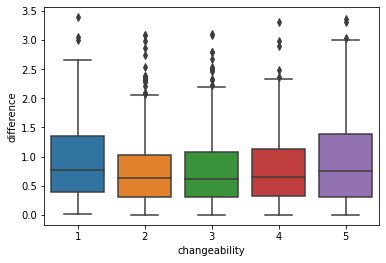

In [ ]:
sns.boxplot(x='changeability', y='difference', data=merged_df)